In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Train_Data.csv')

# Display the first few rows of the dataset
df.head()


,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [2]:
# Check the data types and missing values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

In [3]:
# Fill missing numerical values with median
num_cols = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 
            'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year']
df[num_cols] = df[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical values with mode
df['Food preference'] = df['Food preference'].fillna(df['Food preference'].mode()[0])

# Check if there are any more missing values
df.isnull().sum()


ID1                          0
Specific ailments            0
ID2                          0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Any heriditary condition?    0
Follow Diet                  0
Physical activity            0
Regular sleeping hours       0
Alcohol consumption          0
Social interaction           0
Taking supplements           0
Mental health management     0
Illness count last year      0
Healthy                      0
dtype: int64

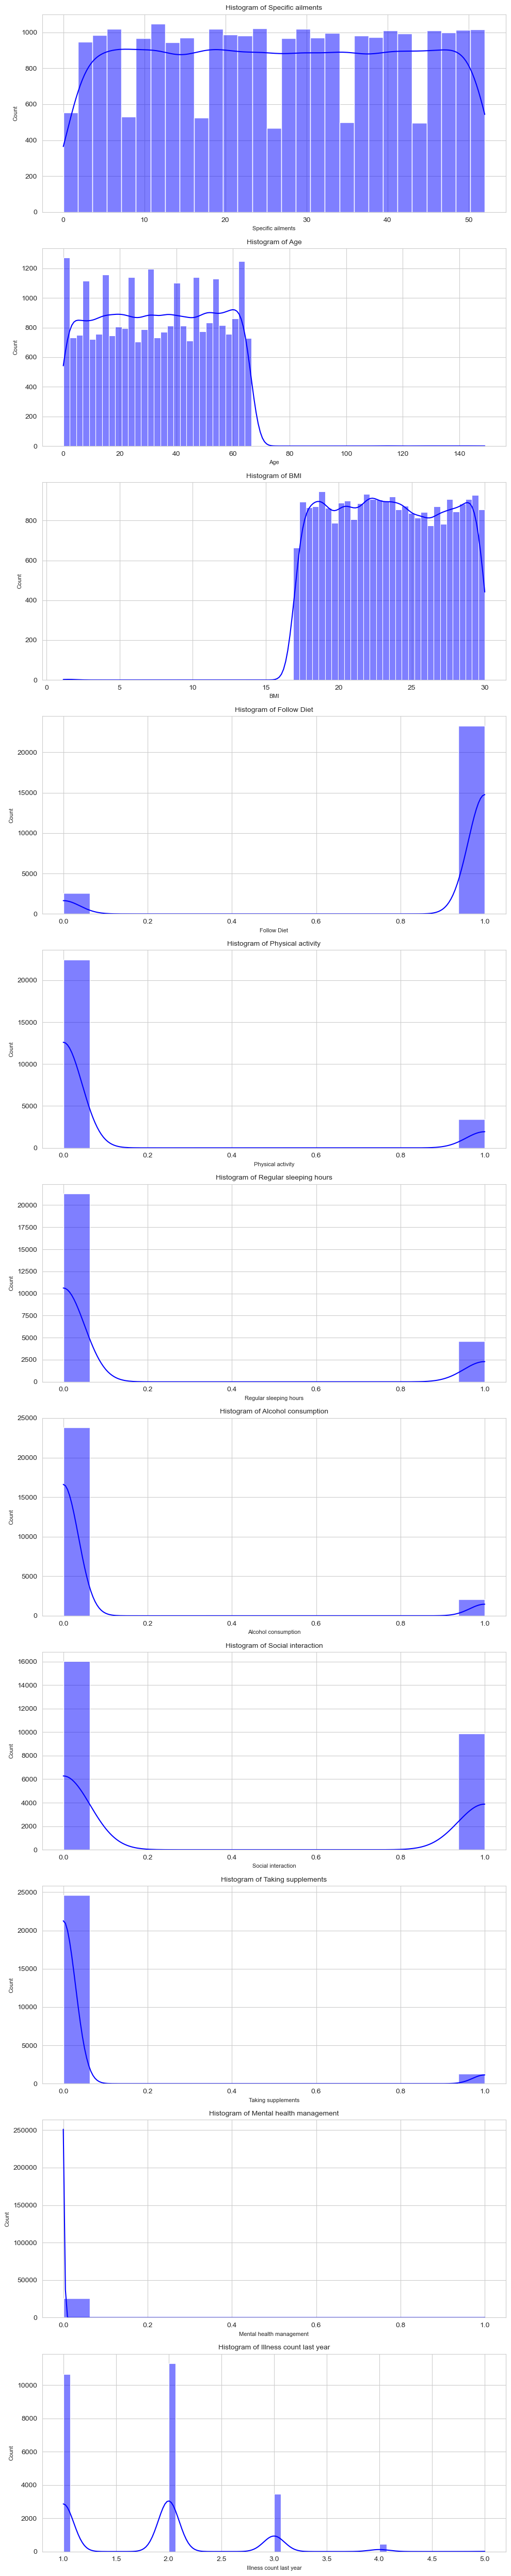

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the plots
sns.set_style('whitegrid')

# List of numerical columns
num_cols = ['Specific ailments', 'Age', 'BMI', 'Follow Diet', 'Physical activity', 
            'Regular sleeping hours', 'Alcohol consumption', 'Social interaction', 
            'Taking supplements', 'Mental health management', 'Illness count last year']

# Create histograms for numerical columns
fig, ax = plt.subplots(len(num_cols), 1, figsize=(10, 50))

for i, col_val in enumerate(num_cols):
    sns.histplot(df[col_val], ax=ax[i], kde=True, color='blue')
    ax[i].set_title('Histogram of ' + col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()


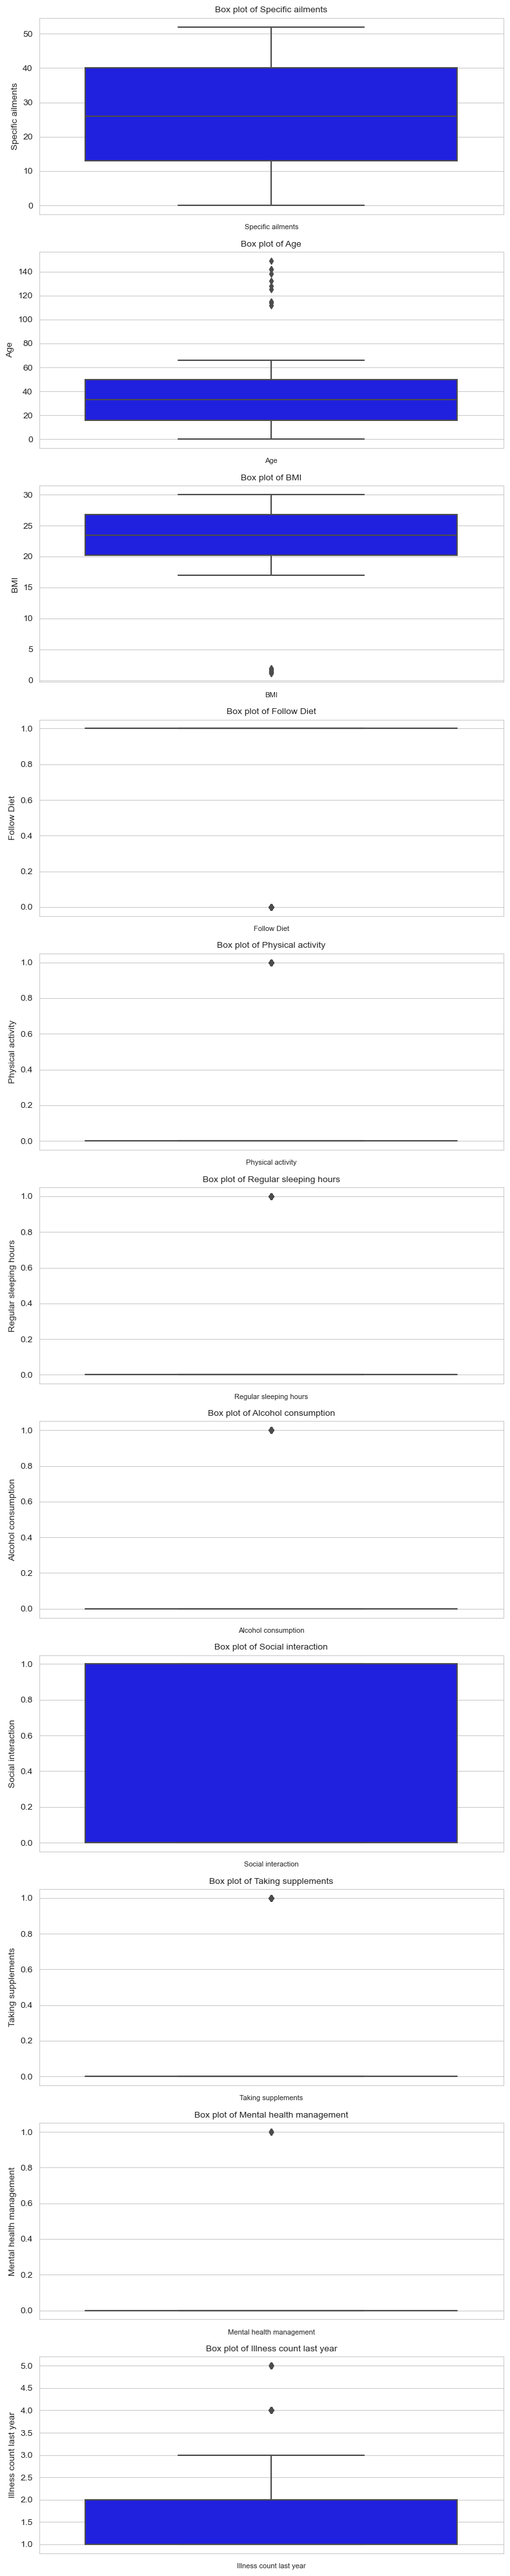

In [5]:
# Create box plots for numerical columns
fig, ax = plt.subplots(len(num_cols), 1, figsize=(8, 40))

for i, col_val in enumerate(num_cols):
    sns.boxplot(y=df[col_val], ax=ax[i], color='blue')
    ax[i].set_title('Box plot of ' + col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)

plt.tight_layout()
plt.show()


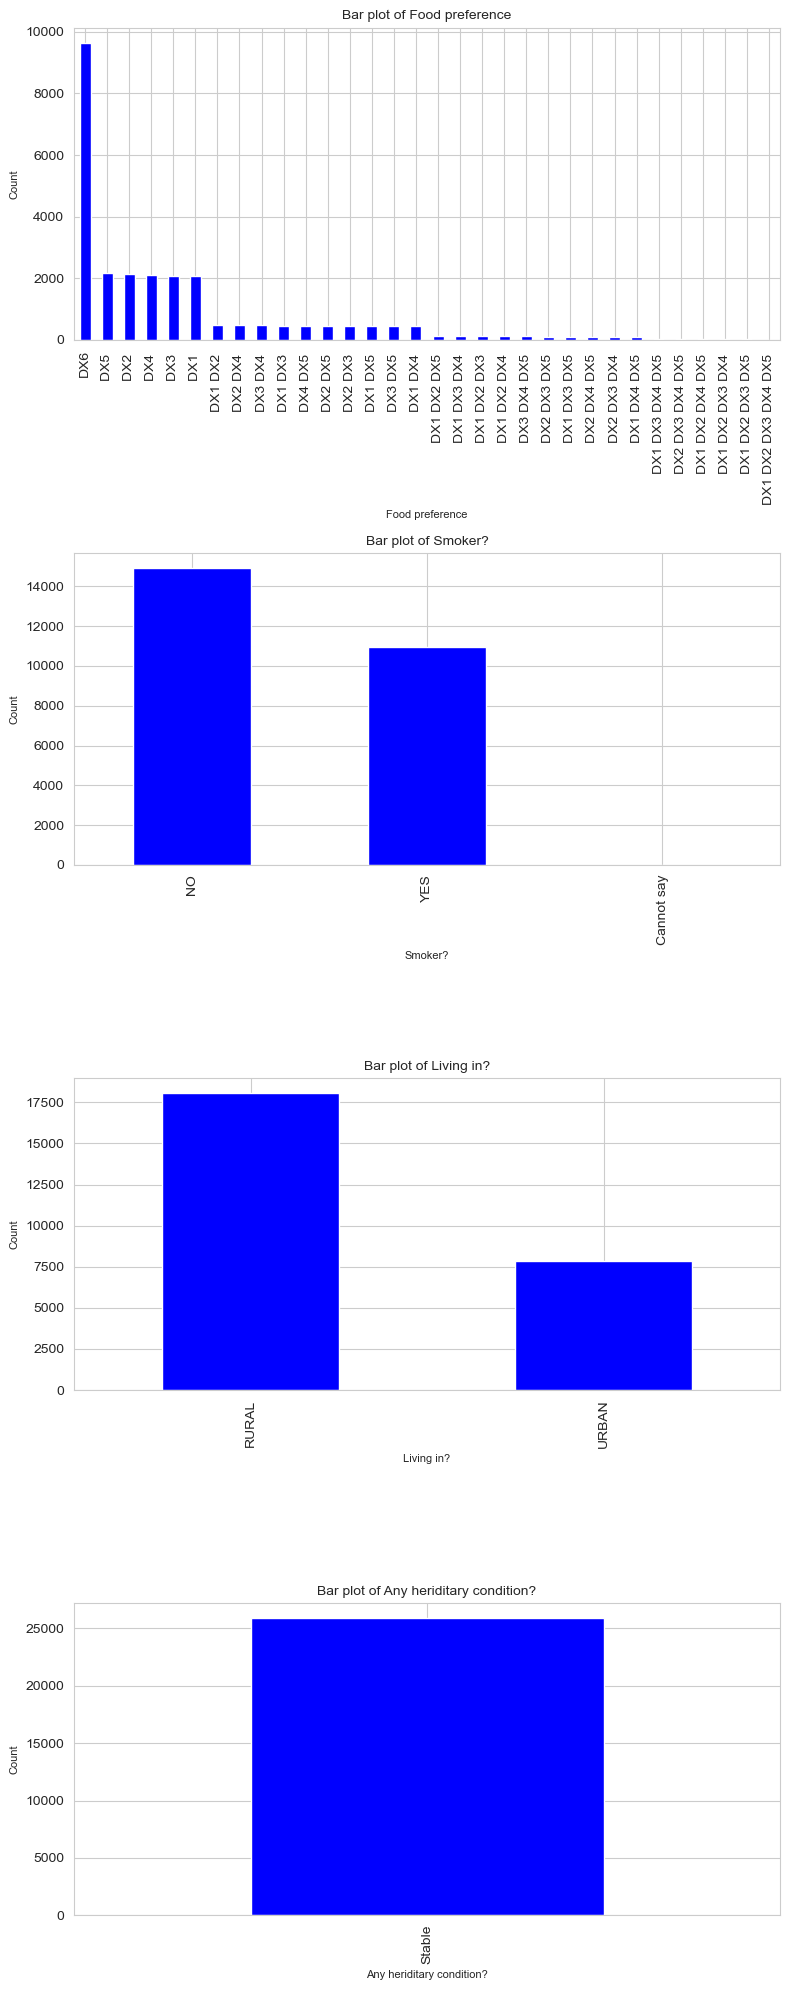

In [6]:
# List of categorical columns
cat_cols = ['Food preference', 'Smoker?', 'Living in?', 'Any heriditary condition?']

# Create bar plots for categorical columns
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(8, 20))

for i, col_val in enumerate(cat_cols):
    df[col_val].value_counts().plot(kind='bar', ax=ax[i], color='blue')
    ax[i].set_title('Bar plot of ' + col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()


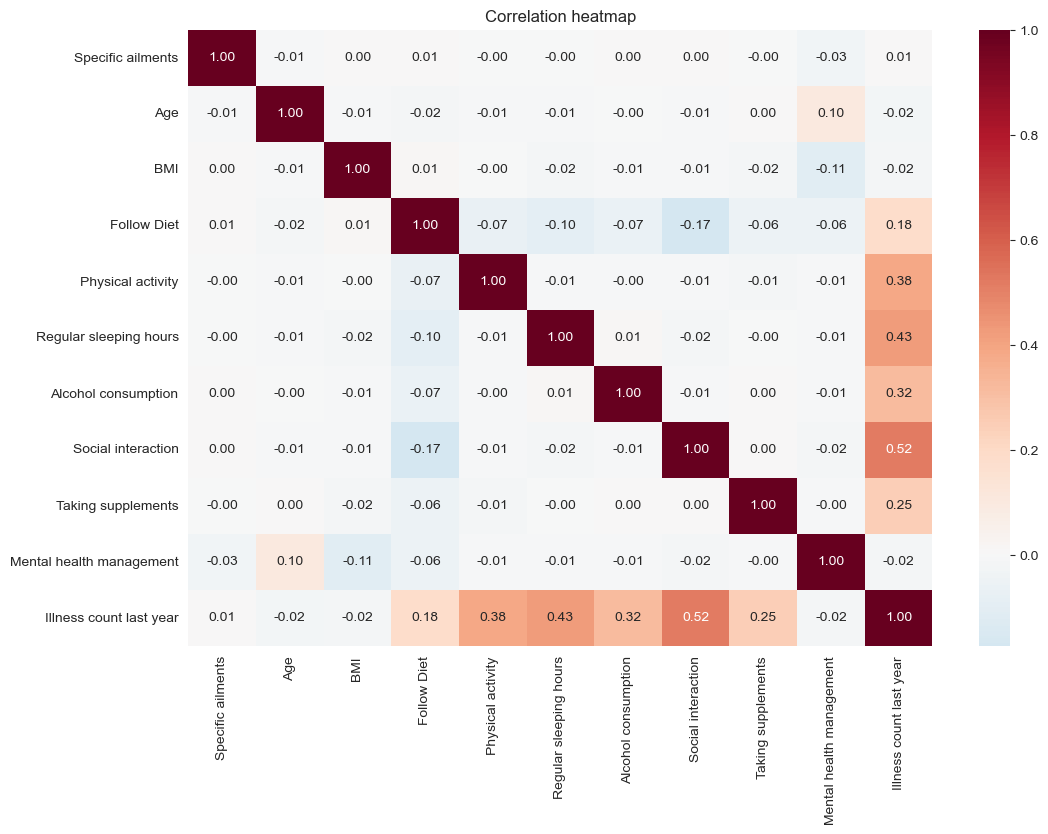

In [7]:
# Calculate the correlation matrix
corr = df[num_cols].corr()

# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title('Correlation heatmap')
plt.show()


In [8]:
# Check the unique values in each categorical column
for col in cat_cols:
    print(f"{col}: {df[col].unique()}")


Food preference: ['DX6' 'DX3 DX4 ' 'DX1 ' 'DX4 DX5 ' 'DX5 ' 'DX2 ' 'DX2 DX4 '
 'DX2 DX4 DX5 ' 'DX2 DX5 ' 'DX3 ' 'DX1 DX5 ' 'DX4 ' 'DX1 DX3 ' 'DX1 DX2 '
 'DX1 DX3 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX2 DX3 DX5 ' 'DX1 DX4 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 ' 'DX2 DX3 ' 'DX3 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX3 DX5 ' 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX4 DX5 ' 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 ']
Smoker?: ['NO' 'YES' 'Cannot say']
Living in?: ['RURAL' 'URBAN']
Any heriditary condition?: ['Stable']


In [9]:
from sklearn.preprocessing import OneHotEncoder

# Split 'Food preference' into multiple binary columns
df_food_pref = df['Food preference'].str.get_dummies(sep=' ')

# One-hot encode 'Smoker?' and 'Living in?'
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_cols = pd.DataFrame(one_hot_encoder.fit_transform(df[['Smoker?', 'Living in?']]), 
                            columns=one_hot_encoder.get_feature_names_out(['Smoker?', 'Living in?']))

# Concatenate the new columns with the original dataframe
df = pd.concat([df, df_food_pref, one_hot_cols], axis=1)

# Drop the original categorical columns and 'Any heriditary condition?'
df = df.drop(['Food preference', 'Smoker?', 'Living in?', 'Any heriditary condition?'], axis=1)

df.head()


C:\Users\satis\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Healthy,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_NO,Smoker?_YES,Living in?_URBAN
0,2408,44,2668,49,20.500470,1.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1,1.0,0.0,0.0
1,25063,39,10363,20,26.076580,0.0,0.0,0.0,0.0,1.0,...,1,0,0,1,1,0,0,1.0,0.0,1.0
2,26798,29,132,1,21.420866,1.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,1,1.0,0.0,1.0
3,31907,27,10499,30,25.203247,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,1.0,0.0,0.0
4,26412,9,7963,40,19.355846,1.0,0.0,0.0,0.0,1.0,...,1,0,0,0,0,0,1,0.0,1.0,0.0


In [10]:
# Drop 'ID1' and 'ID2'
df = df.drop(['ID1', 'ID2'], axis=1)

# Create 'Healthy lifestyle score'
lifestyle_cols = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 
                  'Social interaction', 'Taking supplements', 'Mental health management']
df['Healthy lifestyle score'] = df[lifestyle_cols].sum(axis=1)

df.head()


,Specific ailments,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,...,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_NO,Smoker?_YES,Living in?_URBAN,Healthy lifestyle score
0,44,49,20.500470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1.0,0.0,0.0,1.0
1,39,20,26.076580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,1,1,0,0,1.0,0.0,1.0,1.0
2,29,1,21.420866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,1,1.0,0.0,1.0,1.0
3,27,30,25.203247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1.0,0.0,0.0,1.0
4,9,40,19.355846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0,0,0,0,0,1,0.0,1.0,0.0,2.0


## Test Data

In [11]:
df_test = pd.read_csv('Test_Data.csv')
df_test.head()


,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [12]:
df_test.shape

(6480, 17)

In [13]:
# Check the data types and missing values
df_test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6480 entries, 0 to 6479
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        6480 non-null   int64  
 1   Specific ailments          6480 non-null   int64  
 2   ID2                        6480 non-null   int64  
 3   Food preference            6477 non-null   object 
 4   Age                        6480 non-null   int64  
 5   BMI                        6480 non-null   float64
 6   Smoker?                    6480 non-null   object 
 7   Living in?                 6480 non-null   object 
 8   Any heriditary condition?  6480 non-null   object 
 9   Follow Diet                6218 non-null   float64
 10  Physical activity          6218 non-null   float64
 11  Regular sleeping hours     6218 non-null   float64
 12  Alcohol consumption        6218 non-null   float64
 13  Social interaction         6218 non-null   float

In [14]:
df_test.isnull().sum()

ID1                            0
Specific ailments              0
ID2                            0
Food preference                3
Age                            0
BMI                            0
Smoker?                        0
Living in?                     0
Any heriditary condition?      0
Follow Diet                  262
Physical activity            262
Regular sleeping hours       262
Alcohol consumption          262
Social interaction           262
Taking supplements           262
Mental health management     262
Illness count last year      262
dtype: int64

In [15]:
# Fill missing numerical values with median
num_cols = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 
            'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year']
df_test[num_cols] = df_test[num_cols].apply(lambda x: x.fillna(x.median()))

# Fill missing categorical values with mode
df_test['Food preference'] = df_test['Food preference'].fillna(df_test['Food preference'].mode()[0])

# Check if there are any more missing values
df_test.isnull().sum()


ID1                          0
Specific ailments            0
ID2                          0
Food preference              0
Age                          0
BMI                          0
Smoker?                      0
Living in?                   0
Any heriditary condition?    0
Follow Diet                  0
Physical activity            0
Regular sleeping hours       0
Alcohol consumption          0
Social interaction           0
Taking supplements           0
Mental health management     0
Illness count last year      0
dtype: int64

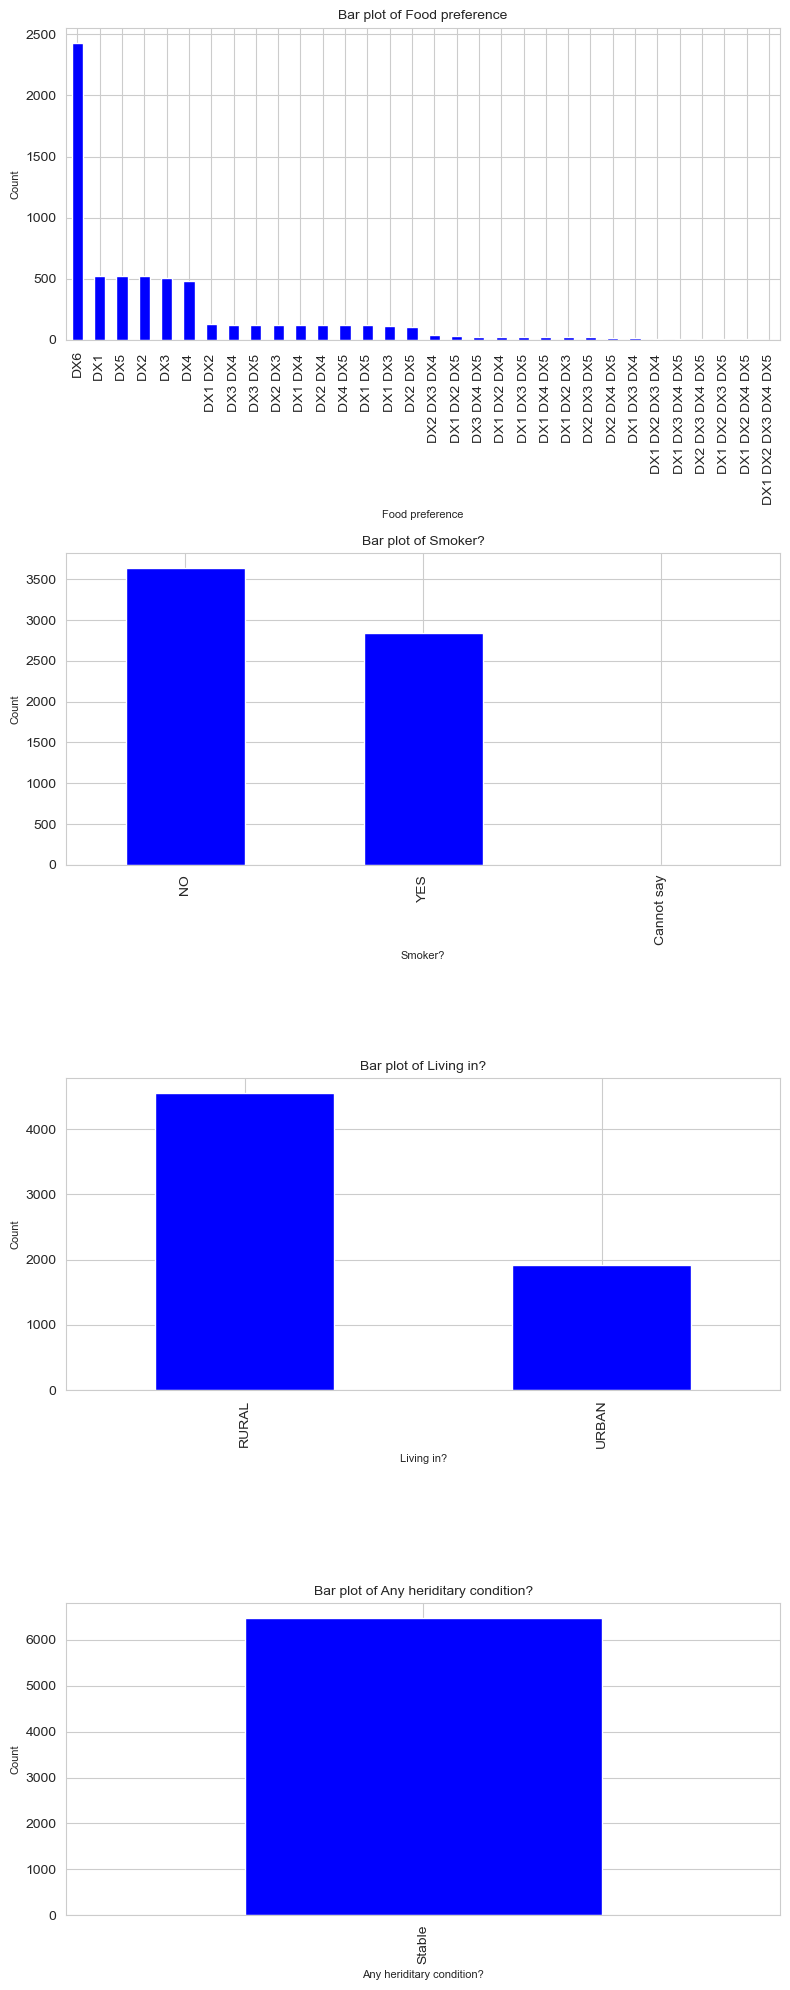

In [16]:
# List of categorical columns
cat_cols = ['Food preference', 'Smoker?', 'Living in?', 'Any heriditary condition?']

# Create bar plots for categorical columns
fig, ax = plt.subplots(len(cat_cols), 1, figsize=(8, 20))

for i, col_val in enumerate(cat_cols):
    df_test[col_val].value_counts().plot(kind='bar', ax=ax[i], color='blue')
    ax[i].set_title('Bar plot of ' + col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    ax[i].set_ylabel('Count', fontsize=8)

plt.tight_layout()
plt.show()

In [17]:
# Check the unique values in each categorical column
for col in cat_cols:
    print(f"{col}: {df_test[col].unique()}")


Food preference: ['DX6' 'DX1 ' 'DX4 ' 'DX5 ' 'DX3 DX4 ' 'DX2 ' 'DX3 ' 'DX3 DX5 ' 'DX2 DX4 '
 'DX1 DX3 ' 'DX1 DX4 ' 'DX1 DX5 ' 'DX3 DX4 DX5 ' 'DX2 DX5 ' 'DX2 DX3 '
 'DX4 DX5 ' 'DX1 DX2 DX5 ' 'DX1 DX2 ' 'DX1 DX3 DX4 ' 'DX2 DX3 DX4 '
 'DX1 DX3 DX5 ' 'DX2 DX4 DX5 ' 'DX1 DX2 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX2 DX3 DX5 ' 'DX1 DX2 DX3 ' 'DX1 DX2 DX4 ' 'DX1 DX2 DX3 DX4 '
 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX5 ']
Smoker?: ['YES' 'NO' 'Cannot say']
Living in?: ['URBAN' 'RURAL']
Any heriditary condition?: ['Stable']


In [18]:
# Split 'Food preference' into multiple binary columns
df_food_pref = df_test['Food preference'].str.get_dummies(sep=' ')

# One-hot encode 'Smoker?' and 'Living in?'
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)
one_hot_cols = pd.DataFrame(one_hot_encoder.fit_transform(df_test[['Smoker?', 'Living in?']]), 
                            columns=one_hot_encoder.get_feature_names_out(['Smoker?', 'Living in?']))

# Concatenate the new columns with the original dataframe
df_new = pd.concat([df_test, df_food_pref, one_hot_cols], axis=1)

# Drop the original categorical columns and 'Any heriditary condition?'
df_new_test = df_new.drop(['Food preference', 'Smoker?', 'Living in?', 'Any heriditary condition?'], axis=1)

df_new_test.head()

C:\Users\satis\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Illness count last year,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_NO,Smoker?_YES,Living in?_URBAN
0,28534,2,3306,38,18.879331,0.0,0.0,0.0,0.0,0.0,...,1.0,0,0,0,0,0,1,0.0,1.0,1.0
1,7970,5,5573,46,21.231991,1.0,0.0,0.0,0.0,0.0,...,1.0,1,0,0,0,0,0,1.0,0.0,1.0
2,22039,37,9305,11,17.867876,1.0,0.0,0.0,0.0,0.0,...,1.0,0,0,0,1,0,0,1.0,0.0,0.0
3,12332,44,8274,10,26.886096,1.0,0.0,0.0,1.0,0.0,...,2.0,0,0,0,0,1,0,1.0,0.0,0.0
4,4116,37,4558,3,23.362746,0.0,1.0,0.0,1.0,0.0,...,2.0,0,0,1,1,0,0,1.0,0.0,0.0


In [19]:
# Drop 'ID1' and 'ID2'
df_new_test = df_new_test.drop(['ID1', 'ID2'], axis=1)

# Create 'Healthy lifestyle score'
lifestyle_cols = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption', 
                  'Social interaction', 'Taking supplements', 'Mental health management']
df_new_test['Healthy lifestyle score'] = df_new_test[lifestyle_cols].sum(axis=1)

df_new_test.head()


,Specific ailments,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,...,DX1,DX2,DX3,DX4,DX5,DX6,Smoker?_NO,Smoker?_YES,Living in?_URBAN,Healthy lifestyle score
0,2,38,18.879331,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,0,0,0,0,1,0.0,1.0,1.0,1.0
1,5,46,21.231991,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1,0,0,0,0,0,1.0,0.0,1.0,1.0
2,37,11,17.867876,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,1,0,0,1.0,0.0,0.0,1.0
3,44,10,26.886096,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0,0,0,0,1,0,1.0,0.0,0.0,2.0
4,37,3,23.362746,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,1,0,0,1.0,0.0,0.0,2.0


In [20]:
X_test_final=df_new_test

## Splitting the training dataset

In [57]:
from sklearn.model_selection import train_test_split

# Split data into features (X) and target (y)
X = df.drop('Healthy', axis=1)
y = df['Healthy']

from imblearn.over_sampling import SMOTE

smote = SMOTE()

X_resampled, y_resampled = smote.fit_resample(X, y)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((26080, 21), (6520, 21), (26080,), (6520,))

In [58]:


# Check the distribution of the target variable after resampling
pd.Series(y_resampled).value_counts()


1    16300
0    16300
Name: Healthy, dtype: int64

## Logistics regression

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize the logistic regression model
lr_model = LogisticRegression(random_state=42)

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Make predictions on the test data
lr_preds = lr_model.predict(X_test)

# Calculate the evaluation metrics
lr_accuracy = accuracy_score(y_test, lr_preds)
lr_precision = precision_score(y_test, lr_preds)
lr_recall = recall_score(y_test, lr_preds)
lr_f1 = f1_score(y_test, lr_preds)
print('F1_score:',lr_f1)
print('accuracy:',lr_accuracy)
print('precision:',lr_precision)
print('dt_recall:',lr_recall)


F1_score: 0.7308114895620782
accuracy: 0.7369631901840491
precision: 0.7492758287737368
dt_recall: 0.7132352941176471


C:\Users\satis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Decision Tree

In [60]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit the model to the training data
dt_model.fit(X_train, y_train)

# Make predictions on the test data
dt_preds = dt_model.predict(X_test)

# Calculate the evaluation metrics
dt_accuracy = accuracy_score(y_test, dt_preds)
dt_precision = precision_score(y_test, dt_preds)
dt_recall = recall_score(y_test, dt_preds)
dt_f1 = f1_score(y_test, dt_preds)
print('F1_score:',dt_f1)
print('accuracy:',dt_accuracy)
print('precision:',dt_precision)
print('dt_recall:',dt_recall)



F1_score: 0.811017597551645
accuracy: 0.8105828220858896
precision: 0.810149801284011
dt_recall: 0.8118872549019608


## Random Forest

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit the model to the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_preds = rf_model.predict(X_test)

# Calculate the evaluation metrics
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_precision = precision_score(y_test, rf_preds)
rf_recall = recall_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds)
print('F1_score:',rf_f1)
print('accuracy:',rf_accuracy)
print('precision:',rf_precision)
print('dt_recall:',rf_recall)


F1_score: 0.859858198823352
accuracy: 0.8575153374233129
precision: 0.8469539375928677
dt_recall: 0.8731617647058824


## Gradient Boosting

In [62]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the gradient boosting classifier
gb_model = GradientBoostingClassifier(random_state=42)

# Fit the model to the training data
gb_model.fit(X_train, y_train)

# Make predictions on the test data
gb_preds = gb_model.predict(X_test)

# Calculate the evaluation metrics
gb_accuracy = accuracy_score(y_test, gb_preds)
gb_precision = precision_score(y_test, gb_preds)
gb_recall = recall_score(y_test, gb_preds)
gb_f1 = f1_score(y_test, gb_preds)
print('F1_score:',gb_f1)
print('accuracy:',gb_accuracy)
print('precision:',gb_precision)
print('dt_recall:',gb_recall)


F1_score: 0.8554895690574084
accuracy: 0.8544478527607362
precision: 0.8504389948531638
dt_recall: 0.8606004901960784


## Random forest using hyperparameter tunning

In [65]:
# Define the parameter grid for Random Forest
rf_params = {'n_estimators': [100, 200, 300, 400, 500],
             'max_depth': [None, 5, 10, 15, 20]}

# Initialize a GridSearchCV object with Random Forest
rf_grid = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=5, scoring='f1')

# Perform hyperparameter tuning (this may take a while)
rf_grid.fit(X_train, y_train)

# Print the best parameters and the best score
rf_grid.best_params_, rf_grid.best_score_


({'max_depth': 15, 'n_estimators': 400}, 0.861528829772297)

## Gradient boosting using hyperparameter tunning

In [53]:
# Define a parameter distribution for Gradient Boosting
gb_dist = {'n_estimators': [100, 200, 300, 400, 500],
           'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3]}

# Initialize a RandomizedSearchCV object with Gradient Boosting
gb_random = GridSearchCV(GradientBoostingClassifier(random_state=42), gb_dist, cv=5, scoring='f1')

# Perform hyperparameter tuning on the sample (this should be faster)
gb_random.fit(X_train, y_train)

# Print the best parameters and the best score
gb_random.best_params_, gb_random.best_score_


({'learning_rate': 0.3, 'n_estimators': 400}, 0.8726489150891996)

## Prediction on test data

## 1. Using Gradient boosting

In [63]:
from sklearn.metrics import f1_score
gb = GradientBoostingClassifier(random_state=42,n_estimators=400,learning_rate=0.3)
gb.fit(X_train, y_train)
y_pred=gb.predict(X_test)
f1_score(y_test,y_pred)

0.8736858144141398

In [27]:
#predicting values on given test data
y_test_final=gb.predict(X_test_final)

In [28]:
resultgb = pd.DataFrame(y_test_final, columns = ['predictions'])

In [113]:
resultgb.to_csv("Satishgbnew.csv", index=False)

In [29]:
resultgb.value_counts()

predictions
1              4157
0              2323
dtype: int64

## 2. Using Random Forest

In [67]:
rf = RandomForestClassifier(random_state=42,n_estimators=400,max_depth=15)
rf.fit(X_train, y_train)
y_pred=rf.predict(X_test)
f1_score(y_test,y_pred)

0.8587105624142662

In [34]:
#predicting values on given test data
y_test_final=rf.predict(X_test_final)

In [35]:
resultrf = pd.DataFrame(y_test_final, columns = ['predictions'])

In [100]:
resultrf.to_csv("Satishrf.csv", index=False)

In [36]:
resultrf.value_counts()

predictions
1              4231
0              2249
dtype: int64

In [39]:
## Stacking classifier

In [52]:
from sklearn.ensemble import StackingClassifier

# Define the base models
base_models = [('Random Forest', RandomForestClassifier(random_state=42,n_estimators=400,max_depth=15)),
               ('Gradient Boosting', GradientBoostingClassifier(random_state=42,n_estimators=400,learning_rate=0.3))]

# Initialize the stacking classifier with Logistic Regression as the meta-model
stacking_model = StackingClassifier(estimators=base_models, final_estimator=RandomForestClassifier(random_state=42), cv=5)

# Fit the model to the training data
stacking_model.fit(X_train, y_train)

# Make predictions on the test data
stacking_preds = stacking_model.predict(X_test)

# Calculate the evaluation metrics
stacking_f1 = f1_score(y_test, stacking_preds)

stacking_f1


0.8585936297891983

In [53]:
y_test_final=stacking_model.predict(X_test_final)

In [54]:
resultsc = pd.DataFrame(y_test_final, columns = ['predictions'])

In [55]:
resultsc.to_csv("Satishsc3.csv", index=False)

In [56]:
resultrf.value_counts()

predictions
1              4231
0              2249
dtype: int64